# Assignment 3 - basic classifiers

Math practice and coding application for main classifiers introduced in Chapter 3 of the Python machine learning book.

### Huang Kai 3035086340

## Weighting

Note that this assignment is more difficult than the previous ones, and thus has a higher weighting 3 and longer duration (3 weeks). Each one of the previous two assignments has a weighting 1.

Specifically, the first 3 assignments contribute to your continuous assessment as follows:

Assignment weights: $w_1 = 1, w_2 = 1, w_3 = 3$

Assignment grades: $g_1, g_2, g_3$

Weighted average: $\frac{1}{\sum_i w_i} \times \sum_i \left(w_i \times g_i \right)$

Future assignments will be added analogously.

# RBF kernel (20 points)

Show that a Gaussian RBF kernel can be expressed as a dot product:
$$
K(\mathbf{x}, \mathbf{y}) 
= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2} 
= \phi(\mathbf{x})^T \phi(\mathbf{y})
$$
by spelling out the mapping function $\phi$.

For simplicity
* you can assume both $\mathbf{x}$ and $\mathbf{y}$ are 2D vectors
$
x =
\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}
, \;
y =
\begin{pmatrix}
y_1 \\
y_2
\end{pmatrix}
$
* we use a scalar unit variance here

even though the proof can be extended for vectors $\mathbf{x}$ $\mathbf{y}$ and general covariance matrices.

Hint: use Taylor series expansion of the exponential function

## Q1 Solution: RBF kernel
$$
\begin{align}
K(\mathbf{x}, \mathbf{y}) 
&= e^\frac{-|\mathbf{x} - \mathbf{y}|^2}{2}
\\
&= e^\frac{-|(x_1-y_1, x_2-y_2)|^2}{2}
\\
&= e^\frac{-(x_1-y_1)^2-(x_2-y_2)^2}{2}
\\
&= e^\frac{-(x_1^2+x_2^2)-(y_1^2+y_2^2)+2(x_1y_1+x_2y_2)}{2}
\\
&= e^\frac{-|\mathbf{x}|^2}{2}e^\frac{-|\mathbf{y}|^2}{2}e^{\mathbf{x}^T\mathbf{y}}
\\
&= e^\frac{-|\mathbf{x}|^2}{2}e^\frac{-|\mathbf{y}|^2}{2} \sum_{n=0}^{\infty} \frac {(\mathbf{x}^T\mathbf{y})^n}{n!}
\end{align}
$$
The last line above follows the Taylor Series Expansion of the exponential function.

The $(\mathbf{x}^T\mathbf{y})^n$ term for each n is the kernel function of the polynomial kernel. We can use the Binomial Theorem to get the component entries:
$$
\begin{align}
(\mathbf{x}^T\mathbf{y})^n
&= (x_1y_1+x_2y_2)^n
\\
&= \sum_{i=0}^n \binom{n}{i}(x_1y_1)^{n-i}(x_2y_2)^i
\\
&= \sum_{i=0}^n \binom{n}{i}x_1^{n-i}x_2^iy_1^{n-i}y_2^i
\end{align}
$$
Then, we can get the mapping function of the polynomial kernel of degree n. 

Let the mapping function be $\varphi(x_1,x_2)$. It will have n entries in total.
$$
\varphi(x_1,x_2) = [x_1^n,\sqrt{\binom{n}{1}}x_1^{n-1}x_2,\sqrt{\binom{n}{2}}x_1^{n-2}x_2^2,...,x_2^n]^T
$$
We can concatenate the entries of each degree polynomial kernel mapping function one after another to form the mapping function of the Gaussian RBF kernel that maps a 2D data to infinite dimensions. 

Finally, we can derive the mapping function of the Gaussian RBF kernel $\phi$:
$$
\begin{align}
\phi(\mathbf{x})
&=\phi(x_1,x_2)
\\
&=e^{-\frac{x_1^2+x_2^2}{2}}[1,\sqrt{\frac{1}{1!}}x_1,\sqrt{\frac{1}{1!}}x_2,\sqrt{\frac{1}{2!}}x_1^2,\sqrt{\frac{2}{2!}}x_1x_2, \sqrt{\frac{1}{2!}}x_2^2,\sqrt{\frac{1}{3!}}x_1^3,\sqrt{\frac{3}{3!}}x_1^2x_2,\sqrt{\frac{3}{3!}}x_2^1,\sqrt{\frac{1}{3!}}x_2^3,...\sqrt{\frac{\binom{n}{i}}{n!}}x_1^ix_2^{n-i}...]^T
\end{align}
$$

# Kernel SVM complexity (10 points)

How would the complexity (or number of parameters) of a kernel SVM change with the amount of training data, and why?
Note that the answer may depend on the specific kernel used.
Consider specifically the following types of kernels $K(\mathbf{x}, \mathbf{y})$.
* linear:
$$
K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}
$$
* polynomial with degree $q$:
$$
K\left(\mathbf{x}, \mathbf{y}\right) =
(\mathbf{x}^T\mathbf{y} + 1)^q
$$
* RBF with distance function $D$:
$$
K\left(\mathbf{x}, \mathbf{y} \right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}
$$


## Q2 Solution: Kernel SVM complexity
Suppose the shape of the training data gives $(\mathbf{n},\mathbf{m})$, namely there are $\mathbf{n}$ samples of training data and each data sample has $\mathbf{m}$ features. We consider the following three kernels:
#### Linear Kernel:
The linear kernel projects to a feature space of dimension $\mathbf{m}$, namely the original space. Thus the number of parameters is linear.

To compute the kernel function $K\left(\mathbf{x}, \mathbf{y}\right) = \mathbf{x}^T \mathbf{y}$ for each pair of data, complexity is $O(\mathbf{m})$. Throughout the training, there are $O(\mathbf{n}^2)$ pairs, the overall complexity of the Lagrangian multiplier process is $O(\mathbf{m}\mathbf{n}^2)$.

#### Polynomial Kernel with degree q:
The polynomial kernel projects to a new feature space of $\mathbf{q}$ polynomial dimension with regard to $\mathbf{m}$. Thus the number of parameters in polynomial.

To compute the kernel function $K\left(\mathbf{x}, \mathbf{y}\right) = (\mathbf{x}^T\mathbf{y} + 1)^q$ for each pair of data, optimal complexity is approximately $O(\mathbf{m}^{log{q}})$if we do the product in a recursive manner. Throughout the training, there are $O(\mathbf{n}^2)$ pairs, the overall complexity of the Lagrangian multiplier process is $O(\mathbf{m}^{log{q}}\mathbf{n}^2)$.

#### RBF Kernel with distance function D:
The polynomial kernel projects to a new feature space of infinite dimensions. Thus the number of parameters tends to infinity.

However, with the kernel trick, to compute the kernel function $K\left(\mathbf{x}, \mathbf{y}\right) = e^{-\frac{D\left(\mathbf{x}, \mathbf{y} \right)}{2s^2}}$ for each pair of data, complexity is $O(\mathbf{m})$if exponential calculation can be performed in constant time. Throughout the training, there are $O(\mathbf{n}^2)$ pairs, the overall complexity of the Lagrangian multiplier process is $O(\mathbf{m}\mathbf{n}^2)$.

# Gaussian density Bayes (30 points)

$$
p\left(\Theta | \mathbf{X}\right)
= 
\frac{p\left(\mathbf{X} | \Theta\right) p\left(\Theta\right)}{p\left(\mathbf{X}\right)}
$$

Assume both the likelihood and prior have Gaussian distributions:

$$
\begin{align}
p(\mathbf{X} | \Theta)
&=
\frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
\\
p(\Theta)
&=
\frac{1}{\sqrt{2\pi}\sigma_0} \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
\end{align}
$$

Derive $\Theta$ from the dataset $\mathbf{X}$ via the following methods:

### ML (maximum likelihood) estimation 
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
$$

### MAP estimation
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
$$

### Bayes estimation

$$
\begin{align}
\Theta_{Bayes} 
&= 
E(\Theta | \mathbf{X})
\\
&= 
\int \Theta p(\Theta | \mathbf{X}) d\Theta
\end{align}
$$

## Q3 Solution: Gaussian density Bayes

### 1. ML (maximum likelihood) estimation
We have the following:
$$
\Theta_{ML} = argmax_{\Theta} p(\mathbf{X} | \Theta)
\\
p(\mathbf{X} | \Theta) = \frac{1}{(2\pi)^{N/2}\sigma^N} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right)
$$
To find the $\Theta$ that maximizes $p(\mathbf{X} | \Theta)$, by taking the negative logarithm on both sides, it is equivalent to find the $\Theta$ that minimizes the following $f(\mathbf{X}, \Theta)$ given the dataset $\mathbf{X}$:
$$
f(\mathbf{X}, \Theta) = \sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2
$$
We can take the derivative of $f(\mathbf{X}, \Theta)$ with regard to $\Theta$ and set it to be 0 to find the $\Theta_{ML}$ that minimizes it:
$$
\frac{\partial f(\mathbf{X}, \Theta)}{\partial \Theta} = -2\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta) = 0
$$
By solving the above equation, we get:
$$
\Theta_{ML} = \mathbf{m} = \frac {\sum_{t=1}^N \mathbf{x}^{(t)}} {N}
$$

### 2. MAP estimation
We have the following:
$$
\begin{align}
\Theta_{MAP} 
&= 
argmax_{\Theta} p(\Theta | \mathbf{X})
\\
&=
argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)
\end{align}
\\
p(\mathbf{X} | \Theta) p(\Theta) = \frac{1}{(2\pi)^{N/2}\sigma^N} \frac{1}{\sqrt{2\pi}\sigma_0} \exp\left(-\frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2}{2\sigma^2}\right) \exp\left( -\frac{(\Theta - \mu_0)^2}{2\sigma_0^2} \right)
$$
To find the $\Theta$ that maximizes $p(\mathbf{X} | \Theta) p(\Theta)$, by taking the negative logarithm on both sides, it is equivalent to find the $\Theta$ that minimizes the following $g(\mathbf{X}, \Theta)$ given the dataset $\mathbf{X}$:
$$
g(\mathbf{X}, \Theta) = \frac{\sum_{t=1}^N (\mathbf{x}^{(t)} - \Theta)^2} {2\sigma^2} + \frac{(\Theta - \mu_0)^2}{2\sigma_0^2}
$$
We can take the derivative of $g(\mathbf{X}, \Theta)$ with regard to $\Theta$ and set it to be 0 to find the $\Theta_{MAP}$ that minimizes it:
$$
\frac{\partial g(\mathbf{X}, \Theta)}{\partial \Theta} = \frac{1}{2\sigma^2\sigma_0^2} (2\sigma_0^2 \sum_{t=1}^N (\Theta - \mathbf{x}^{(t)}) + 2\sigma^2 (\Theta - \mu_0)) = 0
$$
By solving the above equation, we get:
$$
\Theta_{MAP} = \frac{2\sigma^2\mu_0+2\sigma_0^2\sum_{t=1}^N \mathbf{x}^{(t)}}{2\sigma^2+2\sigma_0^2N}
\\
= \frac{\sigma_0^2N}{\sigma^2+\sigma_0^2N} \frac{\sum_{t=1}^N \mathbf{x}^{(t)}}{N}+ \frac{\sigma^2\mu_0}{\sigma^2+\sigma_0^2N}
\\
= \frac{N/\sigma^2}{N/\sigma^2+1/\sigma_0^2}\mathbf{m} + \frac{1/\sigma_0^2}{1/\sigma_0^2+N/\sigma^2}
$$
Thus, we reach the conclusion:
$$
\Theta_{MAP} = \frac{N/\sigma^2}{N/\sigma^2+1/\sigma_0^2}\mathbf{m} + \frac{1/\sigma_0^2}{1/\sigma_0^2+N/\sigma^2}
$$
where $\mathbf{m}=\Theta_{ML}$ in the maximum likelihood estimation.

### 3. Bayes estimation
Since we have $\Theta_{Bayes} = E(\Theta | \mathbf{X})$, we need to find the expectation of $\Theta$ given $\mathbf{X}$. We first consider its density distribution function:
$$
p(\Theta | \mathbf{X}) = p(\mathbf{X} | \Theta) p(\Theta)
$$
Both $p(\mathbf{X} | \Theta)$ and $p(\Theta)$ have Gaussian density distribution, then $p(\Theta | \mathbf{X})$, namely the product of them, also has Gaussian density distribution.
Since for the Gaussian Distribution, its expectation/mean has the largest value of density distribution, to find $E(\Theta | \mathbf{X})$ is equivalent to find $argmax_{\Theta} p(\mathbf{X} | \Theta) p(\Theta)$. That is to say, Bayes estimation and MAP estimation will lead to the same result.
Therefore, we get:
$$
\Theta_{Bayes} = \Theta_{MAP} = \frac{N/\sigma^2}{N/\sigma^2+1/\sigma_0^2}\mathbf{m} + \frac{1/\sigma_0^2}{1/\sigma_0^2+N/\sigma^2}
$$
where $\mathbf{m}=\Theta_{ML}$ in the maximum likelihood estimation.

# Hand-written digit classification (40 points)

In the textbook sample code we applied different scikit-learn classifers for the Iris data set.

In this exercise, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN
* naive Bayes

The dataset is available as part of scikit learn, as follows.

## Load data

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

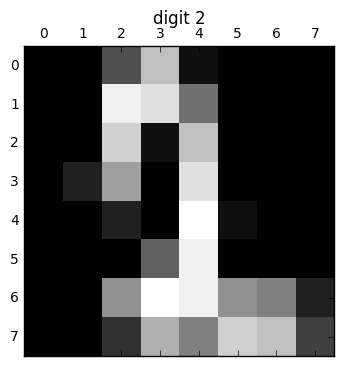

In [3]:
%matplotlib inline
import pylab as pl

index = 12
pl.gray()
pl.matshow(digits.images[index])
pl.title('digit ' + str(digits.target[index]))
pl.show()

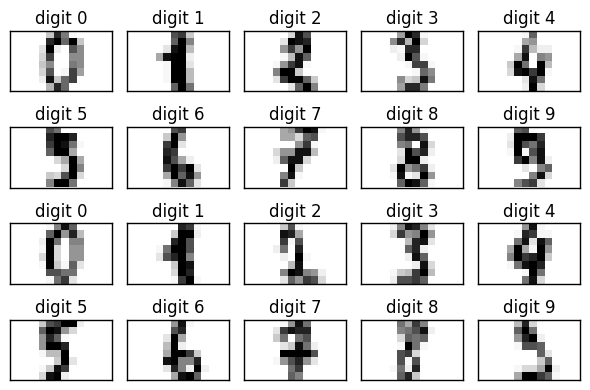

In [4]:
import matplotlib.pyplot as plt
import pylab as pl

num_rows = 4
num_cols = 5

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Date Preprocessing
Hint: How you divide training and test data set? And apply other techinques we have learned if needed.
You could take a look at the Iris data set case in the textbook.

In [5]:
#Your code comes here
#I use sklearn version 0.18 so I just import from sklearn.model_selection instead of sklearn.cross_validation
from sklearn.model_selection import train_test_split
# splitting data into 70% training and 30% test data: 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

num_training = y_train.shape[0]
num_test = y_test.shape[0]
print('training: ' + str(num_training) + ', test: ' + str(num_test))

#Data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

training: 1257, test: 540


## Classifier #1 Perceptron

In [6]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron

#Training
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
#Testing
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 39 out of 540
Accuracy: 0.93


## Classifier #2 Logistic Regression

In [7]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

#Training
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
#Testing
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 35 out of 540
Accuracy: 0.94


## Classifier #3 SVM

In [21]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

#Linear Kernel
#Training
svm = SVC(kernel='linear', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
#Testing
y_pred = svm.predict(X_test_std)
print('Misclassified samples using Linear Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy using Linear Kernel: %.2f' % accuracy_score(y_test, y_pred))

#Polynomial Kernel
svm = SVC(kernel='poly', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples using Polynomial Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy using Polynomial Kernel: %.2f' % accuracy_score(y_test, y_pred))

#RBF Kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples using RBF Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy using RBF Kernel: %.2f' % accuracy_score(y_test, y_pred))

#Sigmoid Kernel
svm = SVC(kernel='sigmoid', random_state=0, gamma=0.01, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples using Sigmoid Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy using Sigmoid Kernel: %.2f' % accuracy_score(y_test, y_pred))

#Use data without normalization
print('\nIf we use data without normalization, we can get the following results:\n')
#Linear Kernel
svm = SVC(kernel='linear', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified samples using Linear Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
from sklearn.metrics import accuracy_score
print('Accuracy using Linear Kernel: %.2f' % accuracy_score(y_test, y_pred))

#Polynomial Kernel
svm = SVC(kernel='poly', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified samples using Polynomial Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy using Polynomial Kernel: %.2f' % accuracy_score(y_test, y_pred))

#RBF Kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified samples using RBF Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy using RBF Kernel: %.2f' % accuracy_score(y_test, y_pred))

#Sigmoid Kernel
svm = SVC(kernel='sigmoid', random_state=0, gamma=0.001, C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Misclassified samples using Sigmoid Kernel: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))
print('Accuracy using Sigmoid Kernel: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples using Linear Kernel: 16 out of 540
Accuracy using Linear Kernel: 0.97
Misclassified samples using Polynomial Kernel: 6 out of 540
Accuracy using Polynomial Kernel: 0.99
Misclassified samples using RBF Kernel: 28 out of 540
Accuracy using RBF Kernel: 0.95
Misclassified samples using Sigmoid Kernel: 19 out of 540
Accuracy using Sigmoid Kernel: 0.96

If we use data without normalization, we can get the following results:

Misclassified samples using Linear Kernel: 14 out of 540
Accuracy using Linear Kernel: 0.97
Misclassified samples using Polynomial Kernel: 11 out of 540
Accuracy using Polynomial Kernel: 0.98
Misclassified samples using RBF Kernel: 89 out of 540
Accuracy using RBF Kernel: 0.84
Misclassified samples using Sigmoid Kernel: 179 out of 540
Accuracy using Sigmoid Kernel: 0.67


## Classifier #4 Decision Tree

In [22]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

#Training. For Decision Tree, just use original data without normalization.
#Here to increase accuracy, I don't restrict the maximum depth to 3.
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)
#Testing
y_pred = tree.predict(X_test)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 71 out of 540
Accuracy: 0.87


## Classifer #5 Random Forest

In [23]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

#Training. For Random Forest, just use original data without normalization.
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=20, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
#Testing
y_pred = forest.predict(X_test)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 19 out of 540
Accuracy: 0.96


## Classifier #6 KNN

In [26]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

#Training
knn = KNeighborsClassifier(n_neighbors=25, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
#Testing
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 29 out of 540
Accuracy: 0.95


## Classifier #7 Naive Bayes

In [27]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.naive_bayes import GaussianNB

#Training
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)
#Testing
y_pred = gnb.predict(X_test_std)
print('Misclassified samples: %d out of %d' % ((y_test != y_pred).sum(), y_test.shape[0]))

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 125 out of 540
Accuracy: 0.77


# Observations
For each classifier, I adjusted the hyper-parameter to get a relatively better accuracy.

After comparing the accuracies printed above, Polynomial Kernel SVM has the best accuracy. This is probably because for the polynomial kernel function, data are mapped to a higher outer space that appropriately fits the data to be separated without causing overfit.
Besides, Random Forest and KNN have good accuracy as well.
Naive Bayes has the worst accuracy possibly due to the reason that it assumes that the features are independent for the likelihood. However, in this case, the pixels of a digit are actually dependent of each other and thus this causes potential misclassifications.

I also observed that the performance of different SVMs varies a lot and the choice of gamma value influences the accuracy greatly. In addition, standardized data will result in a higher accuracy for SVM.